# Titre du brief

## Import des bibliothèques

In [37]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

### CSV

In [38]:
# lire fichier
cd_immo = pd.read_csv("./base_donnees/credit_immo/credit_immo.csv")

cd_immo.head() # afficher les 5 premières lignes

,ID_NOM,Niv_Etude_Bac,age,contrat_de_travail,Salaire,dette_anterieure,etat_civile,apport,enfant_a_Charge,Solvable
0,jean,3.0,45,CDI,40000,4000,M,0.3,3.0,OUI
1,VANESSA,5.0,28,CDI,30500,1320,M,0.1,0.0,OUI
2,TARCISSE,0.0,55,CDI,28000,40000,C,0.0,0.0,NON
3,TIBAULT,4.0,23,CDD,15000,0,M,0.1,NaN,OUI
4,GILES,0.0,33,CDD,27000,3000,C,0.1,2.0,NON


### xls

In [39]:
cd_immo_excel = pd.read_excel("./base_donnees/credit_immo/credit_immo.xls")

cd_immo_excel.head()

,ID_NOM,Niv_Etude_Bac,age,contrat_de_travail,Salaire,dette_anterieure,etat_civile,apport,enfant_a_Charge,Solvable
0,jean,3.0,45,CDI,40000,4000,M,0.3,3.0,OUI
1,VANESSA,5.0,28,CDI,30500,1320,M,0.1,0.0,OUI
2,TARCISSE,0.0,55,CDI,28000,40000,C,0.0,0.0,NON
3,TIBAULT,4.0,23,CDD,15000,0,M,0.1,NaN,OUI
4,GILES,0.0,33,CDD,27000,3000,C,0.1,2.0,NON


###  JSON

In [40]:
cd_immo_json = pd.read_json("./base_donnees/credit_immo/credit_immo.json")

cd_immo_json.head()

,Salaire,ID_NOM,dette_anterieure,apport,contrat_de_travail,enfant_a_Charge,etat_civile,Solvable,age,Niv_Etude_Bac
0,40000,jean,4000,0.3,CDI,3,M,OUI,45,3
1,30500,VANESSA,1320,0.1,CDI,0,M,OUI,28,5
2,28000,TARCISSE,40000,0.0,CDI,0,C,NON,55,0
3,15000,TIBAULT,0,0.1,CDD,,M,OUI,23,4
4,27000,GILES,3000,0.1,CDD,2,C,NON,33,0


In [41]:
# création bdd
data = np.random.randn(6, 4)

In [42]:
# création tableau
bd = ['taux_de_ventes', 'croissance_vente', 'ratio_benefice', 'ratio_perte']
# création DataFrame (données, colonnes)
bdd = pd.DataFrame(data, columns = bd)
print(bdd)

   taux_de_ventes  croissance_vente  ratio_benefice  ratio_perte
0        0.834010         -1.066688       -1.216349     0.007287
1       -1.026476          0.841939        0.619241    -0.682808
2       -2.304500         -0.557334       -0.043585    -0.008472
3        1.933955         -1.101795       -0.876300    -0.688079
4       -0.830748          0.696887       -1.866017    -0.550221
5       -0.911083          1.116146       -0.772742     0.724083


In [43]:
# ajouter valeur manquantes
bdd = bdd.reindex([0,1,2,3,4,5,6])
print(bdd)

   taux_de_ventes  croissance_vente  ratio_benefice  ratio_perte
0        0.834010         -1.066688       -1.216349     0.007287
1       -1.026476          0.841939        0.619241    -0.682808
2       -2.304500         -0.557334       -0.043585    -0.008472
3        1.933955         -1.101795       -0.876300    -0.688079
4       -0.830748          0.696887       -1.866017    -0.550221
5       -0.911083          1.116146       -0.772742     0.724083
6             NaN               NaN             NaN          NaN


In [44]:
# si c'est vide c'est True
bdd.isnull()

,taux_de_ventes,croissance_vente,ratio_benefice,ratio_perte
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,True,True,True,True


In [45]:
# remplacer les valeurs manquantes par 0
bdd.fillna(0)

,taux_de_ventes,croissance_vente,ratio_benefice,ratio_perte
0,0.834010,-1.066688,-1.216349,0.007287
1,-1.026476,0.841939,0.619241,-0.682808
2,-2.304500,-0.557334,-0.043585,-0.008472
3,1.933955,-1.101795,-0.876300,-0.688079
4,-0.830748,0.696887,-1.866017,-0.550221
5,-0.911083,1.116146,-0.772742,0.724083
6,0.000000,0.000000,0.000000,0.000000


In [46]:
# supprimer valeurs manquantes
bdd = bdd.dropna()
print(bdd)

   taux_de_ventes  croissance_vente  ratio_benefice  ratio_perte
0        0.834010         -1.066688       -1.216349     0.007287
1       -1.026476          0.841939        0.619241    -0.682808
2       -2.304500         -0.557334       -0.043585    -0.008472
3        1.933955         -1.101795       -0.876300    -0.688079
4       -0.830748          0.696887       -1.866017    -0.550221
5       -0.911083          1.116146       -0.772742     0.724083


3 Traitement des données

In [47]:
# import bibliothèques
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [48]:
# import jeu de données
cd_immo = pd.read_csv("./base_donnees/credit_immo/credit_immo.csv")

In [49]:
# transformer jeu de données en moyenne
imputer = SimpleImputer()
imputer = imputer.fit(cd_immo.select_dtypes(include='number'))
cd_immo[cd_immo.select_dtypes(include='number').columns] = imputer.transform(cd_immo.select_dtypes(include='number'))

In [50]:
cd_immo.head()

,ID_NOM,Niv_Etude_Bac,age,contrat_de_travail,Salaire,dette_anterieure,etat_civile,apport,enfant_a_Charge,Solvable
0,jean,3.0,45.0,CDI,40000.0,4000.0,M,0.3,3.000000,OUI
1,VANESSA,5.0,28.0,CDI,30500.0,1320.0,M,0.1,0.000000,OUI
2,TARCISSE,0.0,55.0,CDI,28000.0,40000.0,C,0.0,0.000000,NON
3,TIBAULT,4.0,23.0,CDD,15000.0,0.0,M,0.1,1.333333,OUI
4,GILES,0.0,33.0,CDD,27000.0,3000.0,C,0.1,2.000000,NON


In [51]:
# declarer variable le avec la fonction
le = LabelEncoder()

In [52]:
# récupérer les noms des colonnes contenants des objets
label_categ = cd_immo.select_dtypes(include='object').columns
print(label_categ)

Index(['ID_NOM', 'contrat_de_travail', 'etat_civile', 'Solvable'], dtype='object')


In [53]:
# boucle afin de traîter toutes les colonnes
for i in label_categ[1:]:
    cd_immo[i]  = le.fit_transform(cd_immo[i])

In [54]:
cd_immo.head()

,ID_NOM,Niv_Etude_Bac,age,contrat_de_travail,Salaire,dette_anterieure,etat_civile,apport,enfant_a_Charge,Solvable
0,jean,3.0,45.0,1,40000.0,4000.0,1,0.3,3.000000,1
1,VANESSA,5.0,28.0,1,30500.0,1320.0,1,0.1,0.000000,1
2,TARCISSE,0.0,55.0,1,28000.0,40000.0,0,0.0,0.000000,0
3,TIBAULT,4.0,23.0,0,15000.0,0.0,1,0.1,1.333333,1
4,GILES,0.0,33.0,0,27000.0,3000.0,0,0.1,2.000000,0


In [55]:
#Mise à l’échelle des features (StandardScaler).
scaler = StandardScaler()
scaled = scaler.fit_transform(cd_immo.iloc[:,1:-1])
print(scaled)

[[ 0.58477783  0.69964472 -0.16929979 -0.15939982 -0.34223088  0.67936622
   1.24354001  1.32637071]
 [ 1.33663503 -0.77738303 -0.16929979 -0.61392855 -0.45846885  0.67936622
  -0.33161067 -1.06109657]
 [-0.54300798  1.56848458 -0.16929979 -0.73354137  1.21917467 -1.47196014
  -1.11918601 -1.06109657]
 [ 0.96070643 -1.21180295 -1.24153183 -1.35552804 -0.51572038  0.67936622
  -0.33161067  0.        ]
 [-0.54300798 -0.3429631  -1.24153183 -0.7813865  -0.38560325 -1.47196014
  -0.33161067  0.53054828]
 [-0.54300798  0.35210878  1.97516427 -0.15939982 -0.47234801  0.67936622
  -1.11918601  2.12219314]
 [-0.91893658 -0.69049904 -0.16929979  0.31905146 -0.38560325 -1.47196014
  -1.11918601 -1.06109657]
 [-1.67079379 -1.12491897  1.97516427 -0.68569624 -0.2988585  -1.47196014
  -1.11918601 -1.06109657]
 [ 0.         -0.951151   -0.16929979  0.03198069 -0.51572038  0.67936622
  -0.33161067 -0.26527414]
 [ 0.58477783  0.00457284 -0.16929979  0.11810192 -0.42897563  0.67936622
   0.45596467  0.

In [56]:
#Fractionner le jeu de données pour l’entrainement et le test (Training and Test set)
X_train, X_test, y_train, y_test = train_test_split(scaled, cd_immo['Solvable'], test_size=0.2)


4-Visualisation des données

In [57]:
montant_tps = pd.read_csv("./base_donnees/Montant_Temps.csv")

In [58]:
montant_tps.head()

,Montant_du_capitale,Temps
0,1,5
1,12,6
2,13,7
3,2,8
4,3,9


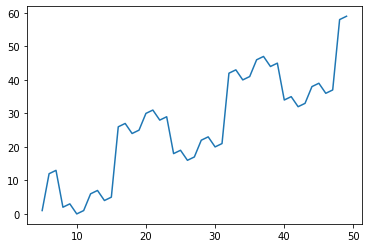

In [59]:
x = montant_tps.iloc[:,1]
y = montant_tps.iloc[:,0]
plt.plot(x, y)
plt.show()

4.1 - Rajoutez du style à vos graphiques

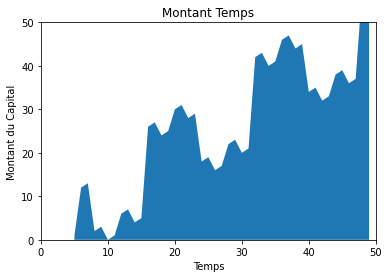

In [61]:
# création , ajout titre et libellé abscisse/ordonnés
plt.figure()
montant_tps = plt.subplot()
l = montant_tps.fill_between(x, y)
montant_tps.set_xlim(0, 50)
montant_tps.set_ylim(0, 50)
plt.title("Montant Temps")
montant_tps = montant_tps.set(xlabel='Temps', ylabel='Montant du Capital')
plt.show()

4.2 - Visualisation de données sous forme de nuage de points

TypeError: 'str' object is not callable

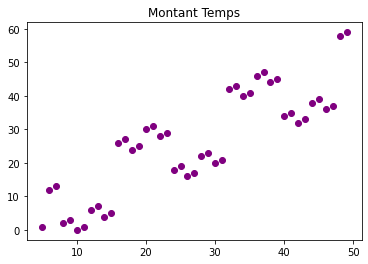

In [ ]:
plt.scatter(x,y,c="purple")
plt.title("Montant Temps")
plt.show()

5 - Analyse de données


5.1 - Mesure de tendance centrale

In [ ]:
tc = pd.read_csv("./base_donnees/tendance_centrale.csv")

In [ ]:
tc.head()

,Nom,Age,Rating
0,ANATOLE,55,4.53
1,Vincent,59,3.54
2,Brenda,55,3.98
3,Philippe,53,5.59
4,Michel,30,3.50



5.2 - Analyse de la variance